# Data Analyst Challenge

Author: Andres Restrepo

## Libraries

In [101]:
#pip install psycopg2

In [102]:
#pip install ydata-profiling

In [103]:
#pip install --upgrade ydata-profiling

In [104]:
#pip install wordcloud

In [105]:
#pip install matplotlib

In [106]:
#pip install --upgrade matplotlib

In [107]:
#pip show matplotlib

In [108]:
#conda install --update matplotlib

In [109]:
#conda update --all

In [110]:
#pip install --upgrade pydantic

In [111]:
#pip install pydantic

In [112]:
#pip install pydantic-settings

In [113]:
#pip uninstall pydantic

In [114]:
#pip install ydata-profiling==4.0.0

In [115]:
#pip install sqlalchemy

In [116]:
#pip install --upgrade typing-extensions

In [117]:
#pip uninstall typing-extensions

In [118]:
#pip install typing-extensions

In [119]:
#conda install sqlalchemy

In [120]:
#conda install pandas_profiling

In [121]:
import psycopg2
import pandas as pd
#import pydantic
#from pydantic.version import version_short
#from pydantic_settings import BaseSettings
#from ydata_profiling import ProfileReport
#from pandas_profiling import ProfileReport
#from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [122]:
# plt.rcParams['font.family'] = 'Arial'  # Specify the font family you want to use
# matplotlib.use('Agg')  # Use the Agg backend (for PNGs)

# Connecting to PostgreSQL

In [123]:
# Connection parameters
hostname = 'localhost'
username = 'postgres'
password = 'Evolucion.2024'
database = 'ces_usa'

# Establish connection
connection = psycopg2.connect(
    host=hostname,
    user=username,
    password=password,
    dbname=database
)

## Reading Government data

In [124]:
# Define SQL query
query_gov = "SELECT * FROM nimble.ce_data_90a;"

# Execute query and fetch data into a pandas DataFrame
df_gov = pd.read_sql_query(query_gov, connection)


In [125]:
df_gov.dtypes

series_id         object
year               int64
period            object
value              int64
footnote_codes    object
dtype: object

In [126]:
df_gov.head(15)

,series_id,year,period,value,footnote_codes
0,CES9000000001,1939,M01,3988,None
1,CES9000000001,1939,M02,4001,None
2,CES9000000001,1939,M03,4002,None
3,CES9000000001,1939,M04,4002,None
4,CES9000000001,1939,M05,4006,None
5,CES9000000001,1939,M06,4003,None
6,CES9000000001,1939,M07,4019,None
7,CES9000000001,1939,M08,4046,None
8,CES9000000001,1939,M09,4076,None
9,CES9000000001,1939,M10,4089,None


In [127]:
df_gov.tail()

,series_id,year,period,value,footnote_codes
58434,CEU9093299910,2023,M09,6222,None
58435,CEU9093299910,2023,M10,6196,None
58436,CEU9093299910,2023,M11,6190,None
58437,CEU9093299910,2023,M12,6207,P
58438,CEU9093299910,2023,M13,6214,P


In [128]:
#df_gov.columns

In [129]:
df_gov['series_id'].unique()

array(['CES9000000001    ', 'CES9000000010    ', 'CES9091000001    ',
       'CES9091000010    ', 'CES9091100001    ', 'CES9091100010    ',
       'CES9091622001    ', 'CES9091622010    ', 'CES9091911001    ',
       'CES9091911010    ', 'CES9091912001    ', 'CES9091912010    ',
       'CES9091999901    ', 'CES9091999910    ', 'CES9092000001    ',
       'CES9092000010    ', 'CES9092161101    ', 'CES9092161110    ',
       'CES9092200001    ', 'CES9092200010    ', 'CES9092262201    ',
       'CES9092262210    ', 'CES9092292001    ', 'CES9092292010    ',
       'CES9092299901    ', 'CES9092299910    ', 'CES9093000001    ',
       'CES9093000010    ', 'CES9093161101    ', 'CES9093161110    ',
       'CES9093200001    ', 'CES9093200010    ', 'CES9093222101    ',
       'CES9093222110    ', 'CES9093248001    ', 'CES9093248010    ',
       'CES9093262201    ', 'CES9093262210    ', 'CES9093292001    ',
       'CES9093292010    ', 'CES9093299901    ', 'CES9093299910    ',
       'CEU900000000

__There were blank spaces in series_id__

### Data cleaning

#### Series id

In [130]:
df_gov['series_id'] = df_gov['series_id'].str.strip()

In [131]:
df_gov['series_id'].unique()

array(['CES9000000001', 'CES9000000010', 'CES9091000001', 'CES9091000010',
       'CES9091100001', 'CES9091100010', 'CES9091622001', 'CES9091622010',
       'CES9091911001', 'CES9091911010', 'CES9091912001', 'CES9091912010',
       'CES9091999901', 'CES9091999910', 'CES9092000001', 'CES9092000010',
       'CES9092161101', 'CES9092161110', 'CES9092200001', 'CES9092200010',
       'CES9092262201', 'CES9092262210', 'CES9092292001', 'CES9092292010',
       'CES9092299901', 'CES9092299910', 'CES9093000001', 'CES9093000010',
       'CES9093161101', 'CES9093161110', 'CES9093200001', 'CES9093200010',
       'CES9093222101', 'CES9093222110', 'CES9093248001', 'CES9093248010',
       'CES9093262201', 'CES9093262210', 'CES9093292001', 'CES9093292010',
       'CES9093299901', 'CES9093299910', 'CEU9000000001', 'CEU9000000010',
       'CEU9091000001', 'CEU9091000010', 'CEU9091100001', 'CEU9091100010',
       'CEU9091622001', 'CEU9091622010', 'CEU9091911001', 'CEU9091911010',
       'CEU9091912001', '

In [132]:
### Data profiling (Not working)

In [133]:
# profile_df_gov = ProfileReport(df_gov, title="Profiling Report df_gov")
# #profile_df_gov.to_file("Profiling Report df_gov.html")
# profile_df_gov.to_notebook_iframe()

#### Period

In [134]:
# Month column
df_gov[df_gov['period']=="M13"]

,series_id,year,period,value,footnote_codes
28065,CEU9000000001,1939,M13,4040,None
28078,CEU9000000001,1940,M13,4251,None
28091,CEU9000000001,1941,M13,4726,None
28104,CEU9000000001,1942,M13,5592,None
28117,CEU9000000001,1943,M13,6222,None
...,...,...,...,...,...
58386,CEU9093299910,2019,M13,6312,None
58399,CEU9093299910,2020,M13,5635,None
58412,CEU9093299910,2021,M13,5670,None
58425,CEU9093299910,2022,M13,5960,None


__There are record with a 13th month with represent the anual average.__

In [135]:
# Dropring annual average
df_gov = df_gov.drop(df_gov[df_gov['period']=="M13"].index)

In [136]:
df_gov[df_gov['period']=="M13"]

,series_id,year,period,value,footnote_codes


### Subsetting

In [137]:
# Subsetting series of interest
# CEU9000000001: All employees, thousands, government, not seasonally adjusted
# CEU9000000010: Women employees, thousands, government, not seasonally adjusted
gov_series = ("CEU9000000001","CEU9000000010")
# df_gov_sub = df_gov[(df_gov.series_id == "CEU9000000001")]
df_gov_sub = df_gov[df_gov['series_id'].isin(gov_series)]

In [138]:
df_gov_sub.head

<bound method NDFrame.head of            series_id  year period  value footnote_codes
28053  CEU9000000001  1939    M01   3958           None
28054  CEU9000000001  1939    M02   3947           None
28055  CEU9000000001  1939    M03   3971           None
28056  CEU9000000001  1939    M04   3985           None
28057  CEU9000000001  1939    M05   4032           None
...              ...   ...    ...    ...            ...
29934  CEU9000000010  2023    M09  13402           None
29935  CEU9000000010  2023    M10  13643           None
29936  CEU9000000010  2023    M11  13756           None
29937  CEU9000000010  2023    M12  13698              P
29939  CEU9000000010  2024    M01  13470              P

[1742 rows x 5 columns]>

In [139]:
df_gov_sub['series_id'].unique()

array(['CEU9000000001', 'CEU9000000010'], dtype=object)

## Reading production employees data

In [140]:
# Define SQL query
query_pro_sup = "SELECT * FROM nimble.ce_data_05a;"

# Execute query and fetch data into a pandas DataFrame
df_pro_sup = pd.read_sql_query(query_pro_sup, connection)


In [141]:
df_pro_sup.head()

,series_id,year,period,value,footnote_codes
0,CES0500000001,1939,M01,25935,None
1,CES0500000001,1939,M02,26099,None
2,CES0500000001,1939,M03,26278,None
3,CES0500000001,1939,M04,26092,None
4,CES0500000001,1939,M05,26293,None


In [142]:
df_pro_sup.tail()

,series_id,year,period,value,footnote_codes
23068,CEU0800000010,2023,M10,60027,None
23069,CEU0800000010,2023,M11,60282,None
23070,CEU0800000010,2023,M12,60354,P
23071,CEU0800000010,2023,M13,59464,P
23072,CEU0800000010,2024,M01,59435,P


In [143]:
df_pro_sup['series_id'].unique()

array(['CES0500000001    ', 'CES0500000006    ', 'CES0500000010    ',
       'CES0500000021    ', 'CES0500000022    ', 'CES0500000023    ',
       'CES0500000025    ', 'CES0500000026    ', 'CES0600000001    ',
       'CES0600000006    ', 'CES0600000010    ', 'CES0600000025    ',
       'CES0700000001    ', 'CES0700000010    ', 'CES0700000025    ',
       'CES0800000001    ', 'CES0800000006    ', 'CES0800000010    ',
       'CEU0500000001    ', 'CEU0500000006    ', 'CEU0500000010    ',
       'CEU0500000024    ', 'CEU0600000001    ', 'CEU0600000006    ',
       'CEU0600000010    ', 'CEU0700000001    ', 'CEU0700000010    ',
       'CEU0800000001    ', 'CEU0800000006    ', 'CEU0800000010    '],
      dtype=object)

__There were blank spaces in series_id__

### Data cleaning

#### Series id

In [144]:
df_pro_sup['series_id'] = df_pro_sup['series_id'].str.strip()

In [145]:
df_pro_sup['series_id'].unique()

array(['CES0500000001', 'CES0500000006', 'CES0500000010', 'CES0500000021',
       'CES0500000022', 'CES0500000023', 'CES0500000025', 'CES0500000026',
       'CES0600000001', 'CES0600000006', 'CES0600000010', 'CES0600000025',
       'CES0700000001', 'CES0700000010', 'CES0700000025', 'CES0800000001',
       'CES0800000006', 'CES0800000010', 'CEU0500000001', 'CEU0500000006',
       'CEU0500000010', 'CEU0500000024', 'CEU0600000001', 'CEU0600000006',
       'CEU0600000010', 'CEU0700000001', 'CEU0700000010', 'CEU0800000001',
       'CEU0800000006', 'CEU0800000010'], dtype=object)

#### Period

In [146]:
# Month column
df_pro_sup[df_pro_sup['period']=="M13"]

,series_id,year,period,value,footnote_codes
12576,CEU0500000001,1939,M13,26606,None
12589,CEU0500000001,1940,M13,28156,None
12602,CEU0500000001,1941,M13,31874,None
12615,CEU0500000001,1942,M13,34621,None
12628,CEU0500000001,1943,M13,36353,None
...,...,...,...,...,...
23019,CEU0800000010,2019,M13,57538,None
23032,CEU0800000010,2020,M13,53516,None
23045,CEU0800000010,2021,M13,55484,None
23058,CEU0800000010,2022,M13,58124,None


__There are record with a 13th month with represent the anual average.__

In [147]:
# Dropring annual average
df_pro_sup = df_pro_sup.drop(df_pro_sup[df_pro_sup['period']=="M13"].index)

In [148]:
df_pro_sup[df_pro_sup['period']=="M13"]

,series_id,year,period,value,footnote_codes


### Subsetting

In [149]:
# Subsetting series of interest
# CEU0500000006: Production and nonsupervisory employees, thousands, total private, not seasonally adjusted
# CEU0500000001: All employees, thousands, total private, not seasonally adjusted
pro_sup_series = ("CEU0500000006", "CEU0500000001")
# df_pro_sup = df_pro_sup[(df_pro_sup.series_id == "CEU0500000006")]
df_pro_sup = df_pro_sup[df_pro_sup['series_id'].isin(pro_sup_series)]

In [150]:
df_pro_sup.head

<bound method NDFrame.head of            series_id  year period   value footnote_codes
12564  CEU0500000001  1939    M01   25338           None
12565  CEU0500000001  1939    M02   25447           None
12566  CEU0500000001  1939    M03   25833           None
12567  CEU0500000001  1939    M04   25801           None
12568  CEU0500000001  1939    M05   26113           None
...              ...   ...    ...     ...            ...
14445  CEU0500000006  2023    M09  108899           None
14446  CEU0500000006  2023    M10  109513           None
14447  CEU0500000006  2023    M11  109887           None
14448  CEU0500000006  2023    M12  109756              P
14450  CEU0500000006  2024    M01  107767              P

[1742 rows x 5 columns]>

In [151]:
df_pro_sup['series_id'].unique()

array(['CEU0500000001', 'CEU0500000006'], dtype=object)

# Transforming data

## Month

In [152]:
# Month listing
month_mapping = {
    'M01': 'January',
    'M02': 'February',
    'M03': 'March',
    'M04': 'April',
    'M05': 'May',
    'M06': 'June',
    'M07': 'July',
    'M08': 'August',
    'M09': 'September',
    'M10': 'October',
    'M11': 'November',
    'M12': 'December'
}

df_gov['month'] = df_gov['period'].map(month_mapping)
df_pro_sup['month'] = df_pro_sup['period'].map(month_mapping)

In [153]:
df_gov.head()

,series_id,year,period,value,footnote_codes,month
0,CES9000000001,1939,M01,3988,None,January
1,CES9000000001,1939,M02,4001,None,February
2,CES9000000001,1939,M03,4002,None,March
3,CES9000000001,1939,M04,4002,None,April
4,CES9000000001,1939,M05,4006,None,May


In [154]:
df_pro_sup.head()

,series_id,year,period,value,footnote_codes,month
12564,CEU0500000001,1939,M01,25338,None,January
12565,CEU0500000001,1939,M02,25447,None,February
12566,CEU0500000001,1939,M03,25833,None,March
12567,CEU0500000001,1939,M04,25801,None,April
12568,CEU0500000001,1939,M05,26113,None,May


## Month year date column

In [155]:
# String year column
df_gov['year_str'] = df_gov['year'].astype(str)
df_pro_sup['year_str'] = df_pro_sup['year'].astype(str)
# Merging month and year columns
df_gov['date'] = df_gov['month'] + ' ' + df_gov['year_str']
df_pro_sup['date'] = df_pro_sup['month'] + ' ' + df_pro_sup['year_str']

In [156]:
df_gov.head()

,series_id,year,period,value,footnote_codes,month,year_str,date
0,CES9000000001,1939,M01,3988,None,January,1939,January 1939
1,CES9000000001,1939,M02,4001,None,February,1939,February 1939
2,CES9000000001,1939,M03,4002,None,March,1939,March 1939
3,CES9000000001,1939,M04,4002,None,April,1939,April 1939
4,CES9000000001,1939,M05,4006,None,May,1939,May 1939


In [157]:
df_pro_sup.head()

,series_id,year,period,value,footnote_codes,month,year_str,date
12564,CEU0500000001,1939,M01,25338,None,January,1939,January 1939
12565,CEU0500000001,1939,M02,25447,None,February,1939,February 1939
12566,CEU0500000001,1939,M03,25833,None,March,1939,March 1939
12567,CEU0500000001,1939,M04,25801,None,April,1939,April 1939
12568,CEU0500000001,1939,M05,26113,None,May,1939,May 1939


In [158]:
df_gov.tail()

,series_id,year,period,value,footnote_codes,month,year_str,date
58433,CEU9093299910,2023,M08,6437,None,August,2023,August 2023
58434,CEU9093299910,2023,M09,6222,None,September,2023,September 2023
58435,CEU9093299910,2023,M10,6196,None,October,2023,October 2023
58436,CEU9093299910,2023,M11,6190,None,November,2023,November 2023
58437,CEU9093299910,2023,M12,6207,P,December,2023,December 2023


In [159]:
df_pro_sup.tail()

,series_id,year,period,value,footnote_codes,month,year_str,date
14445,CEU0500000006,2023,M09,108899,None,September,2023,September 2023
14446,CEU0500000006,2023,M10,109513,None,October,2023,October 2023
14447,CEU0500000006,2023,M11,109887,None,November,2023,November 2023
14448,CEU0500000006,2023,M12,109756,P,December,2023,December 2023
14450,CEU0500000006,2024,M01,107767,P,January,2024,January 2024


## Data frame by series

### Government data

In [160]:
# CEU9000000010: Women employees, thousands, government, not seasonally adjusted
df_gov_w = df_gov[(df_gov.series_id == "CEU9000000010")]
# CEU9000000001: All employees, thousands, government, not seasonally adjusted
df_gov_t = df_gov[(df_gov.series_id == "CEU9000000001")]

In [161]:
df_gov_w['series_id'].unique()

array(['CEU9000000010'], dtype=object)

In [162]:
df_gov_t['series_id'].unique()

array(['CEU9000000001'], dtype=object)

In [163]:
# Column names
df_gov_w = df_gov_w.rename(columns={'value': 'womenInThousands'})
df_gov_t = df_gov_t.rename(columns={'value': 'totalInThousands'})

In [164]:
df_gov_w.head()

,series_id,year,period,womenInThousands,footnote_codes,month,year_str,date
29159,CEU9000000010,1964,M01,3727,None,January,1964,January 1964
29160,CEU9000000010,1964,M02,3776,None,February,1964,February 1964
29161,CEU9000000010,1964,M03,3799,None,March,1964,March 1964
29162,CEU9000000010,1964,M04,3815,None,April,1964,April 1964
29163,CEU9000000010,1964,M05,3806,None,May,1964,May 1964


In [165]:
# Merge series of government data
df_gov_merge = pd.merge(df_gov_w[['date','womenInThousands']], df_gov_t[['date','totalInThousands']], on='date', how='left')

In [166]:
df_gov_merge.head()

,date,womenInThousands,totalInThousands
0,January 1964,3727,9581
1,February 1964,3776,9642
2,March 1964,3799,9689
3,April 1964,3815,9716
4,May 1964,3806,9722


In [167]:
# Women ratio in government
df_gov_merge['wom_gov_ratio'] = round(df_gov_merge['womenInThousands']/df_gov_merge['totalInThousands'],2)

In [168]:
df_gov_merge.head()

,date,womenInThousands,totalInThousands,wom_gov_ratio
0,January 1964,3727,9581,0.39
1,February 1964,3776,9642,0.39
2,March 1964,3799,9689,0.39
3,April 1964,3815,9716,0.39
4,May 1964,3806,9722,0.39


In [169]:
df_gov_merge.tail()

,date,womenInThousands,totalInThousands,wom_gov_ratio
716,September 2023,13402,22984,0.58
717,October 2023,13643,23328,0.58
718,November 2023,13756,23466,0.59
719,December 2023,13698,23361,0.59
720,January 2024,13470,22976,0.59


### Production employees data

In [170]:
# CEU0500000006: Production and nonsupervisory employees, thousands, total private, not seasonally adjusted
df_pro_sup_p = df_pro_sup[(df_pro_sup.series_id == "CEU0500000006")]
# CEU0500000001: All employees, thousands, total private, not seasonally adjusted
df_pro_sup_t = df_pro_sup[(df_pro_sup.series_id == "CEU0500000001")]

In [171]:
df_pro_sup_p['series_id'].unique()

array(['CEU0500000006'], dtype=object)

In [172]:
df_pro_sup_t['series_id'].unique()

array(['CEU0500000001'], dtype=object)

In [173]:
# Column names
df_pro_sup_p = df_pro_sup_p.rename(columns={'value': 'prodInThousands'})
df_pro_sup_t = df_pro_sup_t.rename(columns={'value': 'totalInThousands'})

In [174]:
df_pro_sup_p.head()

,series_id,year,period,prodInThousands,footnote_codes,month,year_str,date
13670,CEU0500000006,1964,M01,38888,None,January,1964,January 1964
13671,CEU0500000006,1964,M02,38951,None,February,1964,February 1964
13672,CEU0500000006,1964,M03,39240,None,March,1964,March 1964
13673,CEU0500000006,1964,M04,39765,None,April,1964,April 1964
13674,CEU0500000006,1964,M05,40258,None,May,1964,May 1964


In [175]:
df_pro_sup_t.head()

,series_id,year,period,totalInThousands,footnote_codes,month,year_str,date
12564,CEU0500000001,1939,M01,25338,None,January,1939,January 1939
12565,CEU0500000001,1939,M02,25447,None,February,1939,February 1939
12566,CEU0500000001,1939,M03,25833,None,March,1939,March 1939
12567,CEU0500000001,1939,M04,25801,None,April,1939,April 1939
12568,CEU0500000001,1939,M05,26113,None,May,1939,May 1939


In [176]:
df_pro_sup_p.tail()

,series_id,year,period,prodInThousands,footnote_codes,month,year_str,date
14445,CEU0500000006,2023,M09,108899,None,September,2023,September 2023
14446,CEU0500000006,2023,M10,109513,None,October,2023,October 2023
14447,CEU0500000006,2023,M11,109887,None,November,2023,November 2023
14448,CEU0500000006,2023,M12,109756,P,December,2023,December 2023
14450,CEU0500000006,2024,M01,107767,P,January,2024,January 2024


In [177]:
df_pro_sup_t.tail()

,series_id,year,period,totalInThousands,footnote_codes,month,year_str,date
13664,CEU0500000001,2023,M09,133861,None,September,2023,September 2023
13665,CEU0500000001,2023,M10,134550,None,October,2023,October 2023
13666,CEU0500000001,2023,M11,134881,None,November,2023,November 2023
13667,CEU0500000001,2023,M12,134900,P,December,2023,December 2023
13669,CEU0500000001,2024,M01,132650,P,January,2024,January 2024


__The start date between the series differ, however it is possible to calculate the ratio from 1964__

In [178]:
# Merge series of government data
df_pro_sup_merge = pd.merge(df_pro_sup_t[['date','totalInThousands']], df_pro_sup_p[['date','prodInThousands']], on='date', how='left')

In [179]:
df_pro_sup_merge.head()

,date,totalInThousands,prodInThousands
0,January 1939,25338,NaN
1,February 1939,25447,NaN
2,March 1939,25833,NaN
3,April 1939,25801,NaN
4,May 1939,26113,NaN


In [180]:
df_pro_sup_merge.tail()

,date,totalInThousands,prodInThousands
1016,September 2023,133861,108899.0
1017,October 2023,134550,109513.0
1018,November 2023,134881,109887.0
1019,December 2023,134900,109756.0
1020,January 2024,132650,107767.0


In [181]:
# Supervisory employees
df_pro_sup_merge['supInThousands'] = df_pro_sup_merge['totalInThousands'] -df_pro_sup_merge['prodInThousands']
# Production employees / supervisory employees Ratio
df_pro_sup_merge['prod_sup_ratio'] = round(df_pro_sup_merge['prodInThousands']/df_pro_sup_merge['supInThousands'],2)

In [182]:
df_pro_sup_merge.head()

,date,totalInThousands,prodInThousands,supInThousands,prod_sup_ratio
0,January 1939,25338,NaN,NaN,NaN
1,February 1939,25447,NaN,NaN,NaN
2,March 1939,25833,NaN,NaN,NaN
3,April 1939,25801,NaN,NaN,NaN
4,May 1939,26113,NaN,NaN,NaN


In [183]:
df_pro_sup_merge.tail()

,date,totalInThousands,prodInThousands,supInThousands,prod_sup_ratio
1016,September 2023,133861,108899.0,24962.0,4.36
1017,October 2023,134550,109513.0,25037.0,4.37
1018,November 2023,134881,109887.0,24994.0,4.40
1019,December 2023,134900,109756.0,25144.0,4.37
1020,January 2024,132650,107767.0,24883.0,4.33


In [184]:
df_pro_sup_merge.dtypes

date                 object
totalInThousands      int64
prodInThousands     float64
supInThousands      float64
prod_sup_ratio      float64
dtype: object

# Exploratory data analysis (EDA)

## Descriptive statistics

In [185]:
df_gov_merge.describe()

,womenInThousands,totalInThousands,wom_gov_ratio
count,721.000000,721.000000,721.000000
mean,9758.671290,18323.237171,0.520527
std,2926.170499,3817.972104,0.060208
min,3506.000000,9342.000000,0.370000
25%,7447.000000,15594.000000,0.480000
50%,10386.000000,19093.000000,0.540000
75%,12586.000000,21957.000000,0.570000
max,13756.000000,23466.000000,0.590000


In [186]:
df_pro_sup_merge.describe()

,totalInThousands,prodInThousands,supInThousands,prod_sup_ratio
count,1021.00000,721.000000,721.000000,721.000000
mean,77039.91381,75677.768377,16841.059639,4.520000
std,31742.88163,19946.939445,4550.930734,0.243168
min,25338.00000,38888.000000,7991.000000,4.090000
25%,45769.00000,58912.000000,13161.000000,4.320000
50%,74297.00000,75872.000000,17469.000000,4.470000
75%,109089.00000,92059.000000,20619.000000,4.720000
max,134900.00000,109887.000000,25144.000000,5.140000


## Ploting

### Women in government

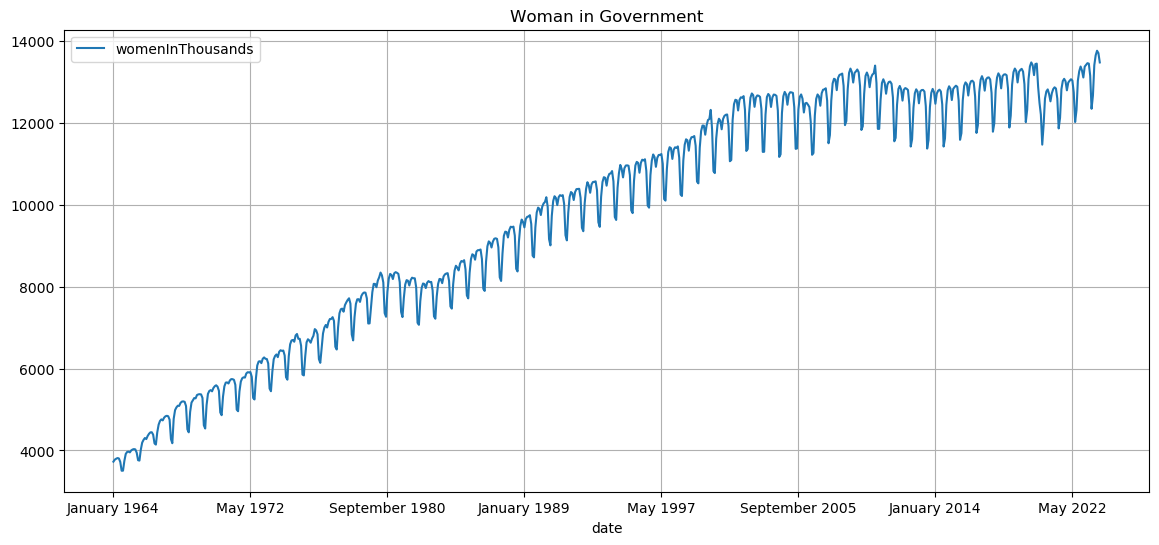

In [187]:
df_gov_merge.plot(x='date', y='womenInThousands', kind='line', figsize=(14, 6))
#plt.xlabel('X-axis label')
#plt.ylabel('Y-axis label')
plt.title('Woman in Government')
plt.grid(True)
plt.show()

### Production / supervisory employees ratio

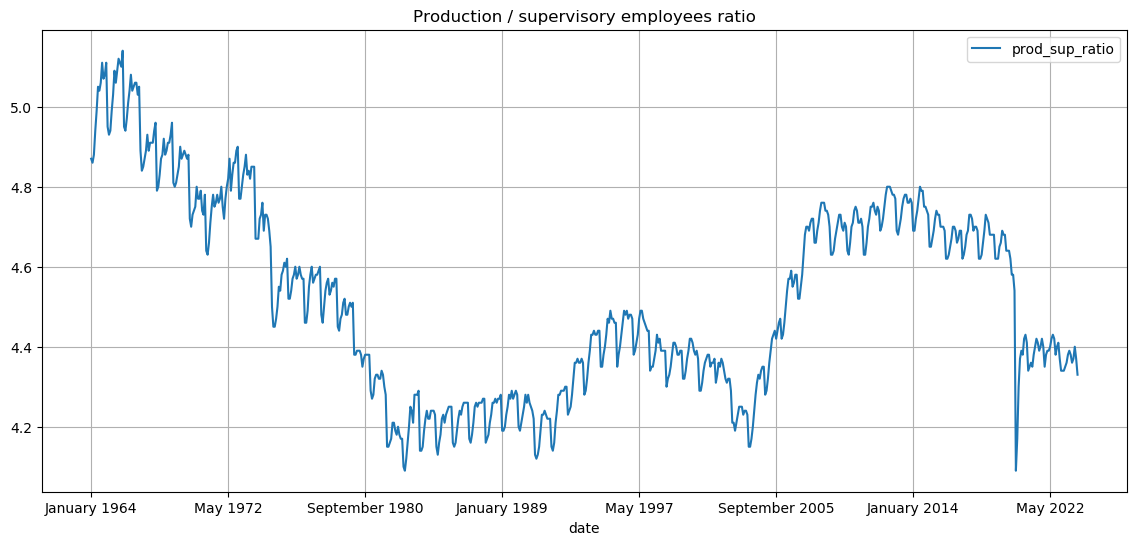

In [188]:
df_pro_sup_merge.plot(x='date', y='prod_sup_ratio', kind='line', figsize=(14, 6))
#plt.xlabel('X-axis label')
#plt.ylabel('Y-axis label')
plt.title('Production / supervisory employees ratio')
plt.grid(True)
plt.show()

# Uploading results to PostgreSQL

## Data preparation

### Women in government

In [189]:
df_gov_merge_final = df_gov_merge

In [190]:
df_gov_merge_final.head()

,date,womenInThousands,totalInThousands,wom_gov_ratio
0,January 1964,3727,9581,0.39
1,February 1964,3776,9642,0.39
2,March 1964,3799,9689,0.39
3,April 1964,3815,9716,0.39
4,May 1964,3806,9722,0.39


### Production / supervisory employees ratio

In [191]:
#df_pro_sup_merge.head()

In [192]:
# Dropping ratio NaN's
df_pro_sup_merge_final = df_pro_sup_merge.dropna(subset=['prod_sup_ratio'])

In [193]:
df_pro_sup_merge_final.head()

,date,totalInThousands,prodInThousands,supInThousands,prod_sup_ratio
300,January 1964,46879,38888.0,7991.0,4.87
301,February 1964,46959,38951.0,8008.0,4.86
302,March 1964,47275,39240.0,8035.0,4.88
303,April 1964,47812,39765.0,8047.0,4.94
304,May 1964,48326,40258.0,8068.0,4.99


## Uploading to PostgreSQL server

In [197]:
# # SQLAlchemy engine
# engine = create_engine(f'postgresql://{username}:{password}@{hostname}/{database}')

# # Table name
# table_name = 'woman_gov'

# # Schema name
# schema = 'nimble'

# # Upload DataFrame to the database
# df_gov_merge_final.to_sql(table_name, engine, schema=schema, if_exists='replace', index=False)

# # Dispose of the engine
# engine.dispose()

In [198]:
# SQLAlchemy engine
engine = create_engine(f'postgresql://{username}:{password}@{hostname}/{database}')

# # Table name
# table_name = 'woman_gov'

# Schema name
schema = 'nimble'

# Upload DataFrame to the database
df_gov_merge_final.to_sql('woman_gov', engine, schema=schema, if_exists='replace', index=False)
df_pro_sup_merge_final.to_sql('pro_sup', engine, schema=schema, if_exists='replace', index=False)

# Dispose of the engine
engine.dispose()